# Data Analysis for the ads in Chinese and English webs.

In [1]:
import numpy as np
import pandas as pd
import csv
import os
import sys
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import math
%matplotlib inline

## Data Reading
使用csv模块来读取表格，分别构建中英文网站信息的表格：

In [2]:
Eng_path = os.path.join(os.getcwd(),'pic_origin')
dir_list = os.listdir(Eng_path)
Eng_data = []
for chart in dir_list:
    file = os.path.join(Eng_path,chart)
    # print(file)
    xls_file = pd.read_excel(file)
    # print(xls_file.describe())
    # xls_file[xls_file['广告种类'].str.isdigit()].dropna()
    Eng_data.append(xls_file)


Chi_path_0 = os.path.join(os.getcwd(),'Chinese_excels_origin')
dir_list = os.listdir(Chi_path_0)
Chi_data = []
for chart in dir_list:
    Chi_path = os.path.join(Chi_path_0,chart)
    tru_list = os.listdir(Chi_path)
    for item in tru_list:
        file = os.path.join(Chi_path,item)
        # print(file)
        xls_file = pd.read_excel(file).fillna(0)
        Chi_data.append(xls_file)


将两个表格合并，并进行数据清洗：
- 去掉收集到的错误数据(相对大小>1,<0)
- 计算得到图片的相对大小(rel_x,rel_y)

In [3]:

all_data = pd.concat(Chi_data+Eng_data,axis=0).fillna(0)
all_data = all_data[(all_data['pos_x'] >= 0) & (all_data['pos_x'] <= 1) &(all_data['pos_y'] >= 0) & (all_data['pos_y'] <= 1) ]
all_data = all_data[(all_data['size_x'] > 0) & (all_data['size_x'] < 2880)]
all_data = all_data[(all_data['size_y'] > 0) & (all_data['size_y'] < 1800)]
all_data['rel_x'] = all_data['size_x'] / 2880
all_data['rel_y'] = all_data['size_y'] / 1800

all_data['pos_x'] = all_data['pos_x'].astype(float)
all_data['pos_y'] = all_data['pos_y'].astype(float)
all_data['rel_x'] = all_data['rel_x'].astype(float)
all_data['rel_y'] = all_data['rel_y'].astype(float)
all_data['size_x'] = all_data['size_x'].astype(float)
all_data['size_y'] = all_data['size_y'].astype(float)

Chi_data = pd.concat(Chi_data,axis=0)
Eng_data = pd.concat(Eng_data, axis=0)
print("Done")


Done


## Allocation map

根据图片种类的不同，提取不同类型图片的表格：
- -1:非广告
- 1 :赌博广告
- 2 :常规广告
- 3 :色情广告

In [4]:
df_notad = all_data[all_data['广告种类'] == -1].fillna(0)
df_gambling = all_data[all_data['广告种类'] == 1 ].fillna(0)
df_reg = all_data[all_data['广告种类'] == 2 ].fillna(0)
df_porn = all_data[all_data['广告种类'] == 3 ].fillna(0)


分别绘制其在归一化的场景下，相对位置分布的散点图：

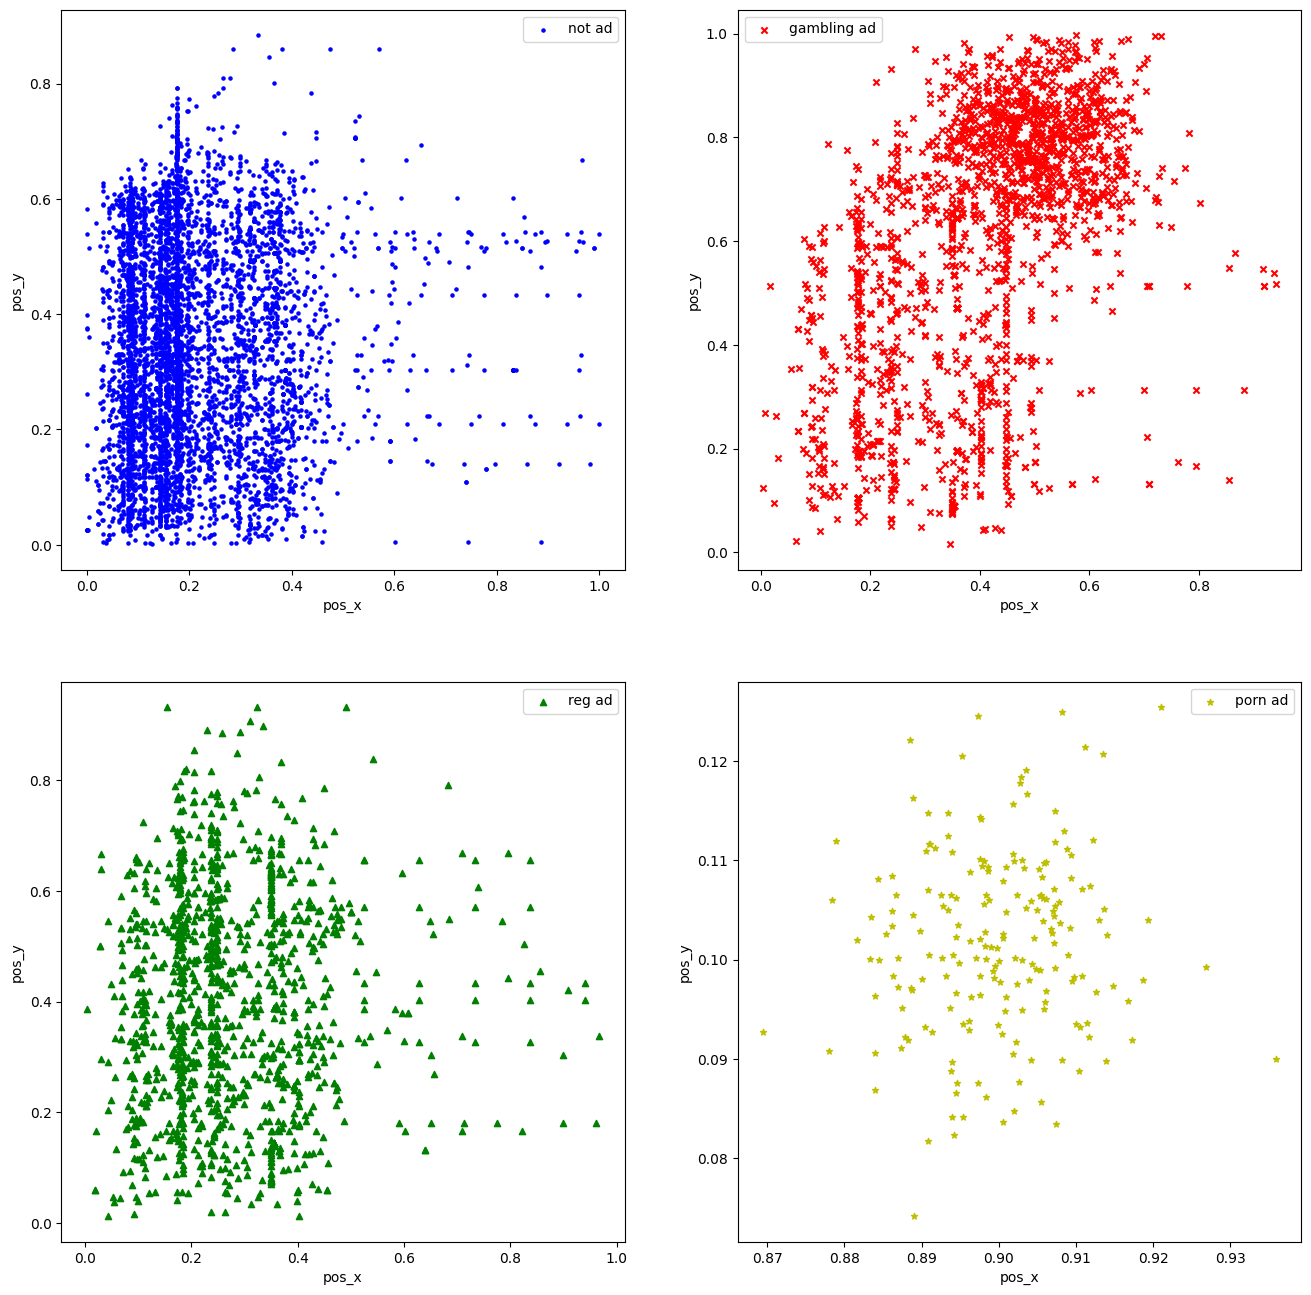

In [5]:
fig = plt.figure(figsize=(16,16))  
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

df_notad.plot.scatter(x='pos_x', y='pos_y', color='b', label='not ad',marker = '.',ax = ax1)
df_gambling.plot.scatter(x='pos_x', y='pos_y', color='r', label='gambling ad',marker = 'x',ax = ax2)
df_reg.plot.scatter(x='pos_x', y='pos_y', color='g', label='reg ad',marker = '^',ax = ax3)
df_porn.plot.scatter(x='pos_x', y='pos_y', color='y', label='porn ad',marker = '*',ax = ax4)
plt.show()


再将其放到同一张图中:

<Figure size 400x400 with 0 Axes>

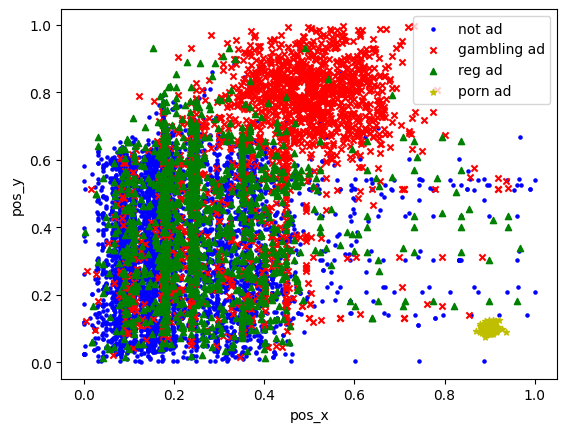

In [6]:
fig = plt.figure(figsize=(4,4))  

ax = df_notad.plot.scatter(x='pos_x', y='pos_y', color='b', label='not ad',marker = '.')
df_gambling.plot.scatter(x='pos_x', y='pos_y', color='r', label='gambling ad',marker = 'x',ax = ax)
df_reg.plot.scatter(x='pos_x', y='pos_y', color='g', label='reg ad',marker = '^',ax = ax)
df_porn.plot.scatter(x='pos_x', y='pos_y', color='y', label='porn ad',marker = '*',ax = ax)
plt.show()

再分别绘制：
- 四类图片在x轴上的分布直方图
- 四类图片在y轴上的分布直方图
- 四类图片的宽度分布直方图
- 四类图片的长度分布直方图


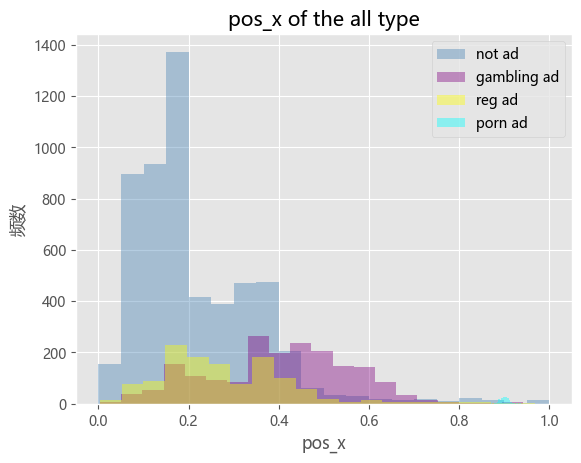

In [7]:

import seaborn as sns

plt.style.use('ggplot')
#处理中文乱码
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
#坐标轴负号的处理
plt.rcParams['axes.unicode_minus']=False
# 绘制直方图
sns.distplot(   df_notad["pos_x"], bins = 20, kde = False,hist_kws = {'color':'steelblue'}, label = 'not ad'     )
sns.distplot(df_gambling["pos_x"], bins = 20, kde = False,hist_kws = {'color':'purple'}   , label = 'gambling ad')
sns.distplot(     df_reg["pos_x"], bins = 20, kde = False,hist_kws = {'color':'yellow'}   , label = 'reg ad'     )
sns.distplot(    df_porn["pos_x"], bins = 20, kde = False,hist_kws = {'color':'cyan'}     , label = 'porn ad'    )

plt.xlabel('pos_x')
plt.ylabel('频数')
# 添加标题
plt.title('pos_x of the all type')
# 显示图例
plt.legend()
# 显示图形
plt.show()

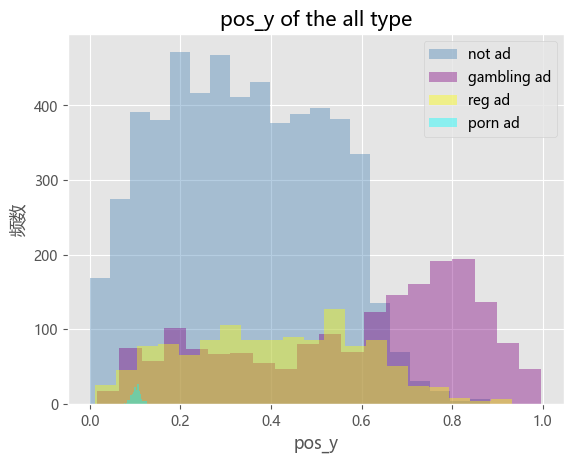

In [8]:

import seaborn as sns

plt.style.use('ggplot')
#处理中文乱码
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
#坐标轴负号的处理
plt.rcParams['axes.unicode_minus']=False
# 绘制直方图
sns.distplot(   df_notad["pos_y"], bins = 20, kde = False,hist_kws = {'color':'steelblue'}, label = 'not ad'     )
sns.distplot(df_gambling["pos_y"], bins = 20, kde = False,hist_kws = {'color':'purple'}   , label = 'gambling ad')
sns.distplot(     df_reg["pos_y"], bins = 20, kde = False,hist_kws = {'color':'yellow'}   , label = 'reg ad'     )
sns.distplot(    df_porn["pos_y"], bins = 20, kde = False,hist_kws = {'color':'cyan'}     , label = 'porn ad'    )

plt.xlabel('pos_y')
plt.ylabel('频数')
# 添加标题
plt.title('pos_y of the all type')
# 显示图例
plt.legend()
# 显示图形
plt.show()

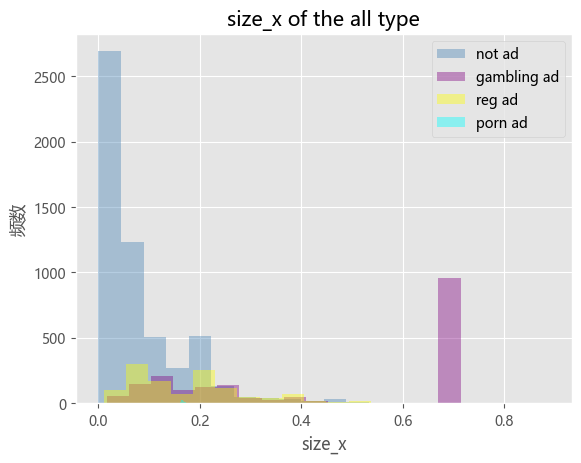

In [9]:

import seaborn as sns

plt.style.use('ggplot')
#处理中文乱码
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
#坐标轴负号的处理
plt.rcParams['axes.unicode_minus']=False
# 绘制直方图
sns.distplot(   df_notad["rel_x"], bins = 20, kde = False,hist_kws = {'color':'steelblue'}, label = 'not ad'     )
sns.distplot(df_gambling["rel_x"], bins = 20, kde = False,hist_kws = {'color':'purple'}   , label = 'gambling ad')
sns.distplot(     df_reg["rel_x"], bins = 20, kde = False,hist_kws = {'color':'yellow'}   , label = 'reg ad'     )
sns.distplot(    df_porn["rel_x"], bins = 20, kde = False,hist_kws = {'color':'cyan'}     , label = 'porn ad'    )
plt.xlabel('size_x')
plt.ylabel('频数')
# 添加标题
plt.title('size_x of the all type')
# 显示图例
plt.legend()
# 显示图形
plt.show()

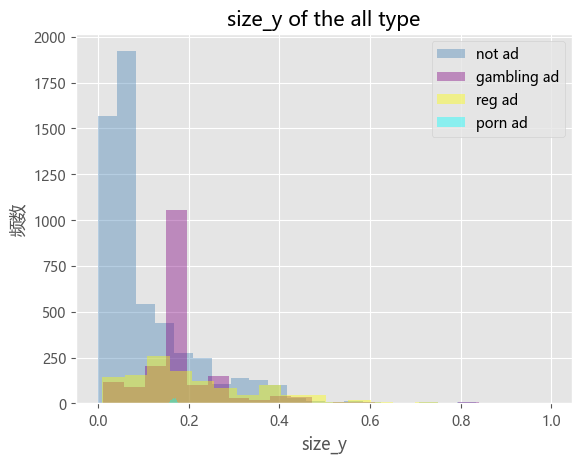

In [10]:

import seaborn as sns

plt.style.use('ggplot')
#处理中文乱码
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
#坐标轴负号的处理
plt.rcParams['axes.unicode_minus']=False
# 绘制直方图
sns.distplot(   df_notad["rel_y"], bins = 20, kde = False,hist_kws = {'color':'steelblue'}, label = 'not ad'     )
sns.distplot(df_gambling["rel_y"], bins = 20, kde = False,hist_kws = {'color':'purple'}   , label = 'gambling ad')
sns.distplot(     df_reg["rel_y"], bins = 20, kde = False,hist_kws = {'color':'yellow'}   , label = 'reg ad'     )
sns.distplot(    df_porn["rel_y"], bins = 20, kde = False,hist_kws = {'color':'cyan'}     , label = 'porn ad'    )

plt.xlabel('size_y')
plt.ylabel('频数')
# 添加标题
plt.title('size_y of the all type')
# 显示图例
plt.legend()
# 显示图形
plt.show()

用矩形表示，各个种类图片的平均位置，在归一化的网页中的相对位置：
- 蓝色:非广告
- 黄色:常规广告
- 紫色:赌博广告
- 青色：色情广告

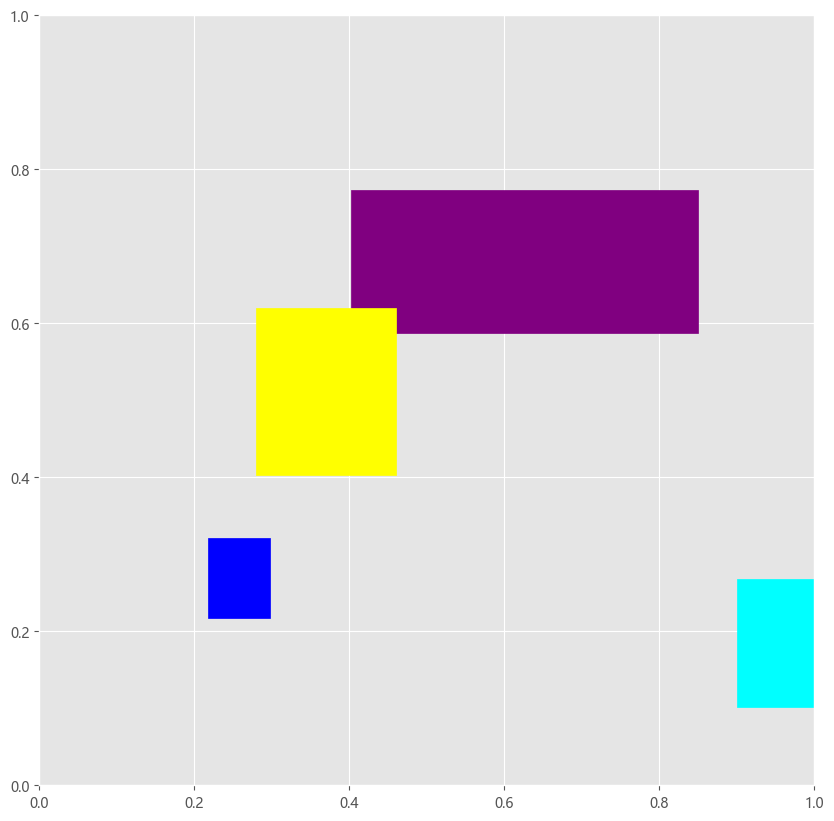

In [11]:
not_ad_pos_x  = df_notad['pos_x'].mean()
not_ad_pos_y  = df_notad['pos_y'].mean()
not_ad_size_x = df_notad['rel_x'].mean()
not_ad_size_y = df_notad['rel_y'].mean()

gambling_ad_pos_x  = df_gambling['pos_x'].mean()
gambling_ad_pos_y  = df_gambling['pos_y'].mean()
gambling_ad_size_x = df_gambling['rel_x'].mean()
gambling_ad_size_y = df_gambling['rel_y'].mean()

reg_ad_pos_x  = df_reg['pos_x'].mean()
reg_ad_pos_y  = df_reg['pos_y'].mean()
reg_ad_size_x = df_reg['rel_x'].mean()
reg_ad_size_y = df_reg['rel_y'].mean()

porn_ad_pos_x  = df_porn['pos_x'].mean()
porn_ad_pos_y  = df_porn['pos_y'].mean()
porn_ad_size_x = df_porn['rel_x'].mean()
porn_ad_size_y = df_porn['rel_y'].mean()


fig_rec = plt.figure(figsize=(10,10))
ax = fig_rec.add_subplot(1, 1, 1)
rect_0 = plt.Rectangle(xy=(0, 0), width=1, height=1,color = 'none',edgecolor = 'black', angle=0.0)
rect_1 = plt.Rectangle(xy=(not_ad_pos_x, not_ad_pos_x), width=not_ad_size_x, height=not_ad_size_y,color = 'blue',edgecolor = 'black', angle=0.0)
rect_2 = plt.Rectangle(xy=(gambling_ad_pos_x, gambling_ad_pos_y), width=gambling_ad_size_x, height=gambling_ad_size_y,color = 'purple',edgecolor = 'black', angle=0.0)
rect_3 = plt.Rectangle(xy=(reg_ad_pos_x, reg_ad_pos_y), width=reg_ad_size_x, height=reg_ad_size_y,color = 'yellow',edgecolor = 'black', angle=0.0)
rect_4 = plt.Rectangle(xy=(porn_ad_pos_x, porn_ad_pos_y), width=porn_ad_size_x, height=porn_ad_size_y,color = 'cyan',edgecolor = 'black', angle=0.0)

ax.add_patch(rect_0)  # 把图形加载到绘制区域
ax.add_patch(rect_1)  # 把图形加载到绘制区域
ax.add_patch(rect_2)  # 把图形加载到绘制区域
ax.add_patch(rect_3)  # 把图形加载到绘制区域
ax.add_patch(rect_4)  # 把图形加载到绘制区域



## Correlation

将各类图片的位置和大小信息提取出来，查看其协方差

1235


<Axes: >

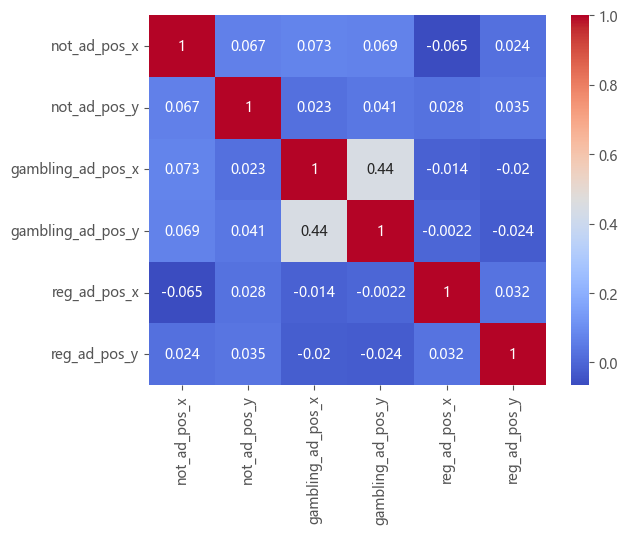

In [12]:

minsize = min([df_notad['pos_x'].size,df_gambling['pos_x'].size, df_reg['pos_x'].size]) 
print(minsize)
df_comed = pd.DataFrame({'not_ad_pos_x':df_notad['pos_x'].to_numpy()[:minsize],
                         'not_ad_pos_y':df_notad['pos_y'].to_numpy()[:minsize],
                         'gambling_ad_pos_x':df_gambling['pos_x'].to_numpy()[:minsize],
                         'gambling_ad_pos_y':df_gambling['pos_y'].to_numpy()[:minsize],
                         'reg_ad_pos_x':df_reg['pos_x'].to_numpy()[:minsize],
                         'reg_ad_pos_y':df_reg['pos_y'].to_numpy()[:minsize]
                         })

sns.heatmap(df_comed.corr(), cmap='coolwarm', annot=True)
